In [2]:
import os
import cv2
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from PIL import Image
from pathlib import Path
from skimage.io import imread
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout,MaxPooling2D, Conv2D, Flatten
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
classes=["NORMAL","PNEUMONIA"]
Numclasses=len(classes)
ImageSize=32
X_train = []
Y_train = []

for index, ClassLabel in enumerate(classes):
    PhotosDir = "chest_xray/chest_xray/train/"+ClassLabel
    files = glob.glob(PhotosDir+"/*.jpeg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((ImageSize,ImageSize))
        data = np.asarray(image)
        X_train.append(data)
        Y_train.append(index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [4]:
classes=["NORMAL","PNEUMONIA"]
Numclasses=len(classes)
ImageSize=32
X_val = []
Y_val = []

for index, ClassLabel in enumerate(classes):
    PhotosDir = "chest_xray/chest_xray/val/"+ClassLabel
    files = glob.glob(PhotosDir+"/*.jpeg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((ImageSize,ImageSize))
        data = np.asarray(image)
        X_val.append(data)
        Y_val.append(index)

X_val = np.array(X_val)
Y_val = np.array(Y_val)

In [5]:
classes=["NORMAL","PNEUMONIA"]
Numclasses=len(classes)
ImageSize=32
X_test = []
Y_test = []

for index, ClassLabel in enumerate(classes):
    PhotosDir = "chest_xray/chest_xray/test/"+ClassLabel
    files = glob.glob(PhotosDir+"/*.jpeg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((ImageSize,ImageSize))
        data = np.asarray(image)
        X_test.append(data)
        Y_test.append(index)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [6]:
X_train = X_train / 255.
X_test = X_test / 255.
X_val= X_val /255.

Y_train = to_categorical(Y_train, 2)
Y_test = to_categorical(Y_test, 2)
Y_val = to_categorical(Y_val, 2)

In [7]:
X_train.shape

(5216, 32, 32, 3)

In [8]:
Y_train.shape

(5216, 2)

In [9]:
model=Sequential()

model.add(Conv2D(filters=32,
        input_shape=(32, 32, 3),
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'
    )
)
model.add(Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'
    )
)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'
    )
)
model.add(Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'
    )
)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation='softmax'))


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [10]:
history_adam=model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val,Y_val)
)

Train on 5216 samples, validate on 16 samples
Epoch 1/20
5216/5216 [==============================] - 16s 3ms/step - loss: 0.3130 - accuracy: 0.8641 - val_loss: 0.3127 - val_accuracy: 0.8750
Epoch 2/20
5216/5216 [==============================] - 18s 3ms/step - loss: 0.1487 - accuracy: 0.9415 - val_loss: 0.6126 - val_accuracy: 0.8125
Epoch 3/20
5216/5216 [==============================] - 16s 3ms/step - loss: 0.0976 - accuracy: 0.9611 - val_loss: 0.9685 - val_accuracy: 0.6250
Epoch 4/20
5216/5216 [==============================] - 18s 3ms/step - loss: 0.0948 - accuracy: 0.9632 - val_loss: 0.4882 - val_accuracy: 0.7500
Epoch 5/20
5216/5216 [==============================] - 16s 3ms/step - loss: 0.0910 - accuracy: 0.9657 - val_loss: 0.4860 - val_accuracy: 0.7500
Epoch 6/20
5216/5216 [==============================] - 18s 3ms/step - loss: 0.0750 - accuracy: 0.9735 - val_loss: 0.5330 - val_accuracy: 0.8125
Epoch 7/20
5216/5216 [==============================] - 17s 3ms/step - loss: 0.0573 

In [13]:
score=model.evaluate(X_test,Y_test)

624/624 [==============================] - 0s 588us/step


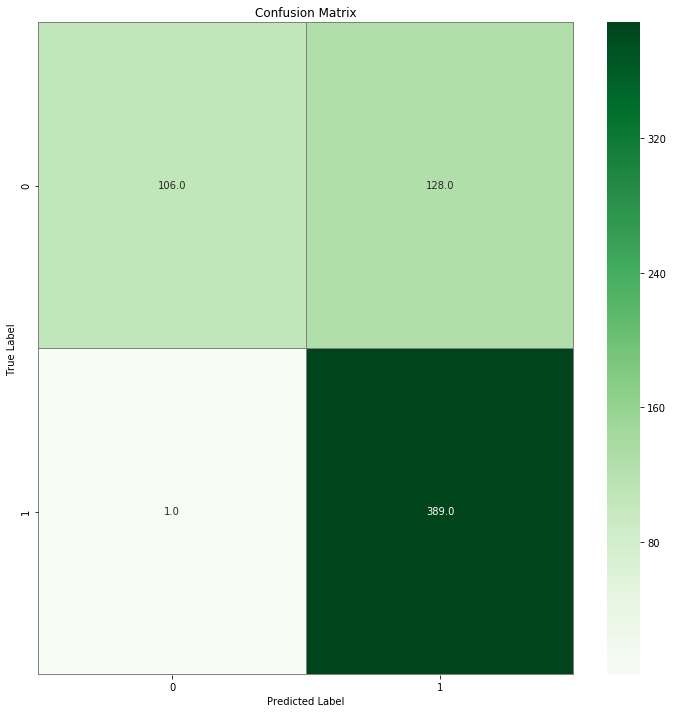

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(Y_test,axis = 1) 
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()